<a href="https://colab.research.google.com/github/sahithi-code/123pet/blob/main/pro119DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving pro119.csv to pro119.csv


In [2]:
import pandas as pd
import csv

col_names = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Survived']
df = pd.read_csv("pro119.csv",names = col_names).iloc[1:]
print(df.head())

  PassengerId Pclass Sex   Age SibSp Parch Survived
1           1      3   1  34.5     1     0        0
2           2      1   0    47     1     0        1
3           3      3   0    62     0     0        1
4           4      1   0    27     1     0        1
5           5      3   1    22     0     0        0


In [3]:
features = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Survived']
X = df[features]
y = df.Survived

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("accuracy: ",metrics.accuracy_score(y_test,y_pred))


accuracy:  1.0


In [6]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus 

dot_data = StringIO()
export_graphviz(clf,out_file=dot_data, filled= True, rounded=True, special_characters=True , feature_names = features , class_names = ['0','1'])
print(dot_data.getvalue())




digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Survived &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<gini = 0.0<br/>samples = 396<br/>value = [396, 0]<br/>class = 0>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 227<br/>value = [0, 227]<br/>class = 1>, fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


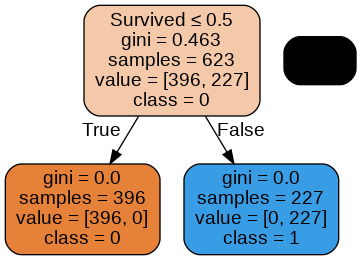

In [7]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Survived.png')
Image(graph.create_png())


In [8]:
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("accuracy: ",metrics.accuracy_score(y_test,y_pred))

accuracy:  1.0
